In [0]:
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist

In [40]:
print(mnist)

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>


In [0]:
(x_train,y_train), (x_test,y_test) = mnist.load_data() #Since data is stored in a tuple of numpy arrays

In [0]:
train_x= train_x/255
test_x = test_x/255

In [70]:
train_x.shape

(60000, 28, 28)

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(256,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(256,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [73]:
r = model.fit(train_x,train_y,epochs=25,validation_data=(test_x,test_y))

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2563 - accuracy: 0.9214 - val_loss: 0.1214 - val_accuracy: 0.9625
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1266 - accuracy: 0.9618 - val_loss: 0.0883 - val_accuracy: 0.9717
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0984 - accuracy: 0.9698 - val_loss: 0.0859 - val_accuracy: 0.9737
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0849 - accuracy: 0.9744 - val_loss: 0.0712 - val_accuracy: 0.9789
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0722 - accuracy: 0.9782 - val_loss: 0.0683 - val_accuracy: 0.9808
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0631 - accuracy: 0.9800 - val_loss: 0.0696 - val_accuracy: 0.9796
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0562 - accuracy: 0.9826 - val_loss: 0.0648 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt

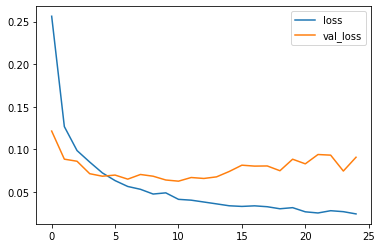

In [74]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

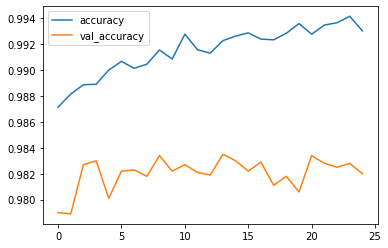

In [67]:
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[ 971    2    2    0    0    0    2    0    1    2]
 [   0 1131    0    1    0    0    1    0    2    0]
 [   0    0 1017    6    1    0    1    5    2    0]
 [   0    0    3 1002    0    3    0    2    0    0]
 [   1    2    2    0  968    0    3    1    0    5]
 [   1    1    0   11    1  874    1    0    2    1]
 [   2    3    1    1    3    8  939    0    1    0]
 [   1    4    6    0    0    0    0 1005    1   11]
 [   0    3    5   13    5    4    1    5  934    4]
 [   1    5    0    7   12    2    1    2    0  979]]


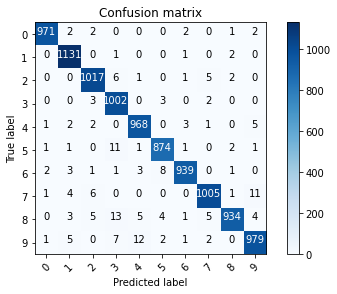

In [77]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

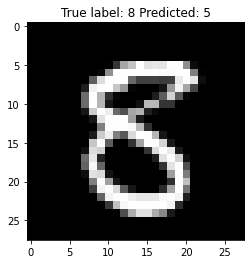

In [82]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));